<h1/>Задачи. Модуль "Введение"</h1>

In [ ]:
def fib(n):
    f0, f1 = 0, 1
    for i in range(2, n + 1):
        f0, f1 = f1, f0 + f1
    return f1

def main():
    n = int(input())
    print(fib(n))


if __name__ == "__main__":
    main()

In [ ]:
def fib_digit(n):
    f0, f1 = 0, 1
    for i in range(2, n+1):
        f0, f1 = f1, (f0 + f1) % 10
    return f1

def main():
    n = int(input())
    print(fib_digit(n))


if __name__ == "__main__":
    main()

In [ ]:
def fib_mod(n, m):
    period = [0, 1]
    for i in range(2, n +1 ):
        period.append((period[i - 1] + period[i - 2]) % m)
        if period[i] == 1 and period[i-1] == 0:
            return period[n % (len(period) - 2)]
    return period[-1]
    
def main():
    n, m = map(int, input().split())
    print(fib_mod(n, m))


if __name__ == "__main__":
    main()
    
"""Известно, что остатки от деления ряда чисел фибоначчи начиная со второго числа фибоначчи на некое натуральное число, 
есть периодическая последовательность. К примеру для числа 2 рядом остатков от деления будет 1 0 1 1 0 1 1 0 1, т. е. 
последовательность 1 0 1, период которой равен 3. Для числа 5 длина такой периодической последовательности будет равна 20. 
20 чисел фибоначчи начиная со второго: 
1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 
Последовательность остатков от деления на 5: 
1 2 3 0 3 3 1 4 0 4 4 3 2 0 2 2 4 1 0 1 
Остаток от деления 2011 на 20 равен 11, таким образом остаток от деления 2011-го числа фибоначчи на 5 будет 11-ым числом 
в последовательности остатков и будет равен 4.
"""

In [ ]:
def gcd(a, b):
    while a != 0 and b != 0: # можно писать так: while a and b:
        if a > b:
            a = a % b
        else:
            b = b % a
    return a + b

def main():
    a, b = map(int, input().split())
    print(gcd(a, b))


if __name__ == "__main__":
    main()

<h1>Практика. Модуль "Введение"</h1>
<h2>Числа Фибоначчи</h2>

In [ ]:
def fib_rc(n):
    assert n >= 0
    return n if n <= 1 else fib_rc(n - 1) + fib_rc(n - 2)

fib_rc(8)

21

In [ ]:
cache = {}
def fib_cache(n):
    assert n >= 0
    if n not in cache:
        cache[n] = n if n <= 1 else fib_cache(n - 1) + fib_cache(n - 2)
    return cache[n]

fib_cache(800)    

69283081864224717136290077681328518273399124385204820718966040597691435587278383112277161967532530675374170857404743017623467220361778016172106855838975759985190398725

In [ ]:
# создадим декоратор memo, чтобы защитить cache от изменений
# с помощью декоратора сможем даже рекурсивный алгоритм fib_rc превратить в fib_naive

def memo(f):
    cache = {}
    def inner(n):
        if n not in cache:
            cache[n] = f(n)
        return cache[n]
    return inner

fib_rc = memo(fib_rc)  # вместо этого часто используют синтаксис @memo перед функцией fib_rc
fib_rc(80)

23416728348467685

In [ ]:
# вместо костыля-memo легче испольщовать lru_cache из модуля_functools

from functools import lru_cache

fib_rc = lru_cache(maxsize=None)(fib_rc)  # maxsize - сколько значений хранить в кэше
fib_rc(80)

23416728348467685

In [ ]:
# но лучший из предложенных алгоритмов - алгоритм с итерацией

def fib_top(n):
    assert n >= 0
    f0, f1 = 0, 1
    for i in range(n-1):
        f0, f1 = f1, f0 + f1
    return f1

fib_top(8000)

3561533204460626739768914905427460387141369539110154082973500638991885819498711815304829246223963373749873423083216889782034228521693267175594214186111978816819236959743284321273097535654614718808050244321699002512466203835566030351092652496815708455980825654877181538741827129421689128991879649533246136168998590044965735035810856774605383628378979290580539135791985063484992877932473487054068899476937399295193905527420792975902913836012199062687063537510151753758100626402591751183925883151617648375005313453493271681248233059858496951790113255897429539560654496639601132039360167542277472498901884679404509894269174519328918160745655327632006736189766801968534195725815421784083495026969542066047758885029695257263330719223956309043195653930347983496830801755572982419821881275569179922973415736010289561700699477021488635509784509168019589640190234350021673802856836365767446249424907273016689053388000785637444921523414602360860001530139933615215383220927084750528293779491002813557093860863839

In [ ]:
# замерим время для алгоритмов

import time

def timed(f, *args, n_iter=100):
    acc = float('inf')
    for i in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        t1 = time.perf_counter()
        acc = min(acc, t1 - t0)
    return acc

timed(fib_top, 800)

9.193943457675357e-05

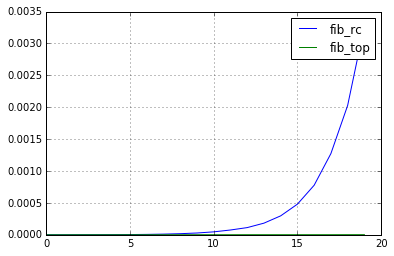

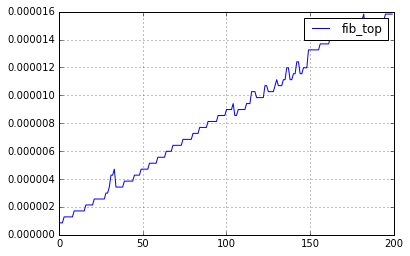

In [ ]:
# построим графики по времени для fib_rc и fib_top

# %matplotlib inline  чтобы выводить графики прямо в скетче,

from matplotlib import pyplot as plt


def compare(fs, args):
    for f in fs:
        plt.plot(args, [timed(f, arg) for arg in args], label = f.__name__)
    plt.legend()
    plt.grid(True)
    plt.show()
    
compare([fib_rc, fib_top], list(range(20)))
compare([fib_top], list(range(200)))

<h2>Наибольший общий делитель (НОД)</h2>

In [ ]:
# напишем тест для gcd

import random

def test(gcd, n_iter=100):
    for i in range(n_iter):
        c = random.randint(0, 1024)
        a = c * random.randint(0, 128)
        b = c * random.randint(0, 128)
        assert gcd(a, a) == gcd(a, 0) == a
        assert gcd(b, b) == gcd(b, 0) == b
        assert gcd(a, 1) == gcd(b, 1) == 1
        d = gcd(a, b)
        assert a % d == b % d == 0

In [23]:
def gcd_naive(a, b):
    assert a >= 0 and b >= 0
    for d in reversed(range(max(a, b) + 1)):
        if d == 0 or a % d == b % d == 0:
            return d
    
gcd_naive(8, 3), gcd_naive(8, 0), gcd_naive(0, 0)

(1, 8, 0)

In [ ]:
# Алгоритм Эвклида

def gcd_Evklid(a, b):
    assert a >= 0 and b >= 0
    while a and b:
        if a >= b:
            a %= b
        else:
            b %= a
    return a + b

In [ ]:
# Продвинутый алгоритм Евклида (рекурсия + чередование)

def gcd_top(a, b):
    assert a >= 0 and b >= 0
    if a == 0 or b == 0:
        return max(a, b)
    return gcd_top(b % a, a)

<h4> Теорема:<br/>
     Для двух чисел a и b наименьшее общее кратное можно найти по формуле: НОК = a*b / НОД(a,b)</h4>

In [ ]:
# реализация НОК

def lcm(a,b):
    m = a * b
    while a != 0 and b != 0:
        if a > b:
            a %= b
        else:
            b %= a
    return m // (a + b)